In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report

# Introduzione

A partire da due dataset contenenti rispettivamente utenti reali e finti (bot) appartenti al social network Facebook, l'obiettivo è quello di creare dei modelli di Machine Learning che possano distinguere con una buona precisione un utente reale da uno fake, confrontando i risultati ottenuti.

Le feature presenti nei dataset sono le seguenti:

| Feature  | Descrizione  |
|:---|:---|
| Id | Id dell'utente |
| name  | Nome dell'utente | 
| screen_name  | Username (alias) dell'utente |
| statuses_count  | Numero di "stati" (post) pubblicati dall'utente |
| followers_count  | Numero di follower | 
| friends_count  | Numero di amici |
| favourites_count  | Numero di profili/pagine segnati come preferiti |
| listed_count  | Numero di elencati | 
| created_at  | Data in cui l'account è stato creato |
| url  | Indirizzo url del profilo |
| lang  | Lingua impostata per il profilo | 
| time_zone  | Fuso orario impostato per il profilo |
| location  | Posizione geografica |
| default_profile  | Se 1 allora il profilo è impostato come default per l'utente | 
| default_profile_image | Se 1 allora l'immagine di profilo è quella di default |
| geo_enabled | Indica lo stato di attivazione della geolocalizzazione |
| profile_image_url | Indirizzo url dell'immagine del profilo | 
| profile_banner_url | Indirizzo url del banner del profilo  |
| profile_use_background_image | Se 1 allora viene usata un'immagine di background |
| profile_background_image_url_https  | Indirizzo url https dell'immagine di background  | 
| profile_text_color  | Colore utilizzato per il testo del profilo  |
| profile_image_url_https | Indirizzo url https dell'immagine del profilo  |
| profile_sidebar_border_color | Colore del bordo della barra laterale  | 
| profile_background_tile | Stato di tassellamento dello sfondo del profilo |
| profile_sidebar_fill_color | Colore del riempimento della barra laterale |
| profile_background_image_url | Indirizzo url https dell'immagine di sfondo  | 
| profile_background_color | Colore dello sfondo |
| profile_link_color  | Colore del link del profilo  |
| utc_offset  | Differenza tra il Coordinate Universal Time e l'orario locale impostato per il profilo | 
| protected  | Indica se il profilo è privato  |
| verified | Indica se il profilo è verificato dall'applicazione  |
| description | Testo della descrizione del profilo | 
| updated | Data di ultimo update |

Prima di eseguire operazioni di feature selection o feature analysis, le feature che intuitivamente potranno essere quelle più indicative e che quindi probabilmente dovranno essere usate sono:
- statuses_count
- followers_count
- friends_count
- favourites_count

I modelli di Machine Learning utilizzati per la classificazione saranno Support Vector Machine, Nearest Neighbors e Sequential Neural Network.

# Feature Selection

Tentativo di feature selection per scoprire velocemente quali possono essere quelle più utili per identificare un utente fake:

In [23]:
#si importano i dataset
real_users = pd.read_csv("data/users.csv")
fake_users = pd.read_csv("data/fake_users.csv")

#si uniscono i dataset
x = pd.concat([real_users,fake_users])
x = pd.get_dummies(x)

#si distinguono utenti fake (0) da utenti reali (1)
y = len(fake_users)*[0] + len(real_users)*[1]

In [24]:
#si dividono training e testing data
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 100)

Nella fase di feature selection, si utilizzano un classificatore Nearest Neighbor (knn con k=3) e l'algoritmo di Forward Stepsize, SequentialFeatureSelector del modulo sklearn:

In [26]:
#si definisce il classificatore knn
knn = KNeighborsClassifier(n_neighbors=3)

#si definisce il selettore delle feature
sfs = SequentialFeatureSelector(knn, n_features_to_select=4)

#si esegue la feature selection trasformando i dati di conseguenza, mantenendo solo le feature selezionate
sfs.fit_transform(X_train, y_train)

**Problema noto:** l'algoritmo di feature selection non termina, il suo scopo è confermare che le feature migliori da utilizzare per il training siano le seguenti: 
- statuses_count
- followers_count
- friends_count
- favourites_count

# Feature Analysis

Per questa fase si utilizza il dataset che comprende entrambi i tipi di utente, con una feature aggiuntiva, "isFake", che vale 1 se l'utente è fake o 0 se è reale.

In [66]:
real_users = pd.read_csv("data/users.csv")
fake_users = pd.read_csv("data/fake_users.csv")

real_users['isFake'] = 0
fake_users['isFake'] = 1

dataset = pd.concat([real_users,fake_users])

train_data, test_data = train_test_split(dataset, test_size = 0.20, random_state = 100)

Si droppano tutte le feature che presentano tutti valori univoci, sicuramente non avranno correlazione con "isFake"

In [67]:
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

train_data = train_data.drop('screen_name', axis=1)
test_data = test_data.drop('screen_name', axis=1)

train_data = train_data.drop('url', axis=1)
test_data = test_data.drop('url', axis=1)

train_data = train_data.drop('profile_image_url', axis=1)
test_data = test_data.drop('profile_image_url', axis=1)

train_data = train_data.drop('profile_banner_url', axis=1)
test_data = test_data.drop('profile_banner_url', axis=1)

train_data = train_data.drop('profile_background_image_url_https', axis=1)
test_data = test_data.drop('profile_background_image_url_https', axis=1)

train_data = train_data.drop('profile_image_url_https', axis=1)
test_data = test_data.drop('profile_image_url_https', axis=1)

train_data = train_data.drop('profile_background_image_url', axis=1)
test_data = test_data.drop('profile_background_image_url', axis=1)

train_data = train_data.drop('dataset', axis=1)
test_data = test_data.drop('dataset', axis=1)

Encoding delle feature per poter utilizzare la funzione di correlazione e visualizzare una heatmap (modulo seaborn):

In [70]:
features_to_encode = ['name', 'time_zone', 'location', 'profile_sidebar_fill_color', 'profile_background_color', 
                      'profile_link_color', 'description', 'updated']

labelEncoder1 = LabelEncoder()

for feature in train_data:
    train_data[feature] = labelEncoder1.fit_transform(train_data[feature])
    
for feature in test_data:
    test_data[feature] = labelEncoder1.fit_transform(test_data[feature])

Si verifica la correlazione tra ciascuna feature conservata e isFake, per vedere quali sono quelle più adatte da utilizzare per il training

<AxesSubplot:>

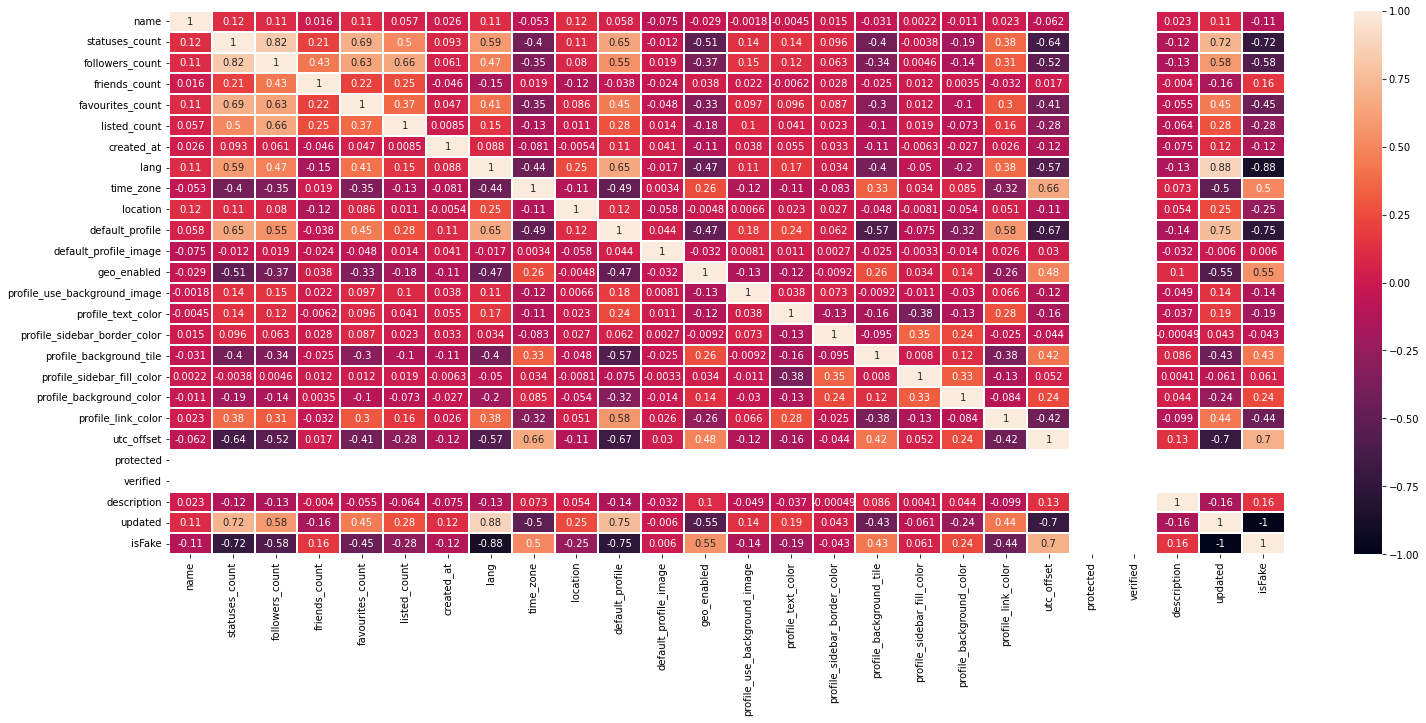

In [76]:
#Creo la heatmap per vedere le correlazioni tra le feature
plt.figure(figsize=(25,10))
correlation = train_data.corr()
sns.heatmap(correlation, annot = True, linewidth = 2)

Dall'analisi si nota che le feature più correlate con "isFake" sono:
- **statuses_count**
- **followers_count** 
- **friends_count**
- **favourites_count** 
- **time_zone**
- **lang** 
- **geo_enabled** 
- **profile_background_tile**
- **profile_background_color** 
- **utc_offset** 
- **updated** 
- **default_profile**

Si nota che sono presenti sia le quattro feature che intuitivamente si poteva predirre sarebbero state utilizzate (statutes_count, followers_count, friends_count, favourites_count), inoltre sono presenti alcune feature che erano state segnate come "in forse" e che quindi si confermano come utili (time_zone, lang, default_profile, geo_enabled). Sono presenti un po' a sorpresa alcune feature che invece intuitivamente si erano ritenute non importanti, ma che invece si sono rivelate esserlo (tutte le feature selezionate rimanenti)

# Training

Nella fase di training, si costruiscono i due data frame train_data e test_data, droppando tutte le feature che non sono state selezionate nella precedente fase di analisi:

In [164]:
real_users = pd.read_csv("data/users.csv")
fake_users = pd.read_csv("data/fake_users.csv")

real_users['isFake'] = 0
fake_users['isFake'] = 1

dataset = pd.concat([real_users,fake_users])

train_data, test_data = train_test_split(dataset, test_size = 0.20, random_state = 100)

In [165]:
train_data.drop(train_data.columns.difference(['statuses_count','followers_count', 'friends_count',
                                               'favourites_count', 'time_zone', 'lang', 'geo_enabled', 
                                               'profile_background_tile', 'profile_background_color', 
                                               'utc_offset', 'updated', 'default_profile','isFake']),
                                                1, inplace=True)

test_data.drop(test_data.columns.difference(['statuses_count','followers_count', 'friends_count',
                                               'favourites_count', 'time_zone', 'lang', 'geo_enabled', 
                                               'profile_background_tile', 'profile_background_color', 
                                               'utc_offset', 'updated', 'default_profile','isFake']),
                                                1, inplace=True)

/tmp/ipykernel_10038/3085869492.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data.drop(train_data.columns.difference(['statuses_count','followers_count', 'friends_count',
/tmp/ipykernel_10038/3085869492.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data.drop(test_data.columns.difference(['statuses_count','followers_count', 'friends_count',


Affinché possa essere utilizzato un modello di classificazione, si normalizzano tutte le feature eseguendo un'operazione di encoding:

In [166]:
features_to_encode = ['time_zone', 'lang', 'geo_enabled', 'profile_background_tile', 'profile_background_color', 
                    'utc_offset', 'updated', 'default_profile']

labelEncoder1 = LabelEncoder()

for feature in train_data:
    train_data[feature] = labelEncoder1.fit_transform(train_data[feature])
    
for feature in test_data:
    test_data[feature] = labelEncoder1.fit_transform(test_data[feature])

Ci troviamo in un contesto supervisionato, si definisce l'output corretto da confrontare con quello predetto dai modelli:

In [167]:
y_train = train_data.isFake          
X_train = train_data.drop(['isFake'], axis=1)  

y_test = test_data.isFake         
X_test = test_data.drop(['isFake'], axis=1)

## Support Vector Machine

In [124]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_lr = clf.score(X_test,y_test)

print("Accuracy: {:.3f}%".format(accuracy_lr*100))

Accuracy: 98.582%


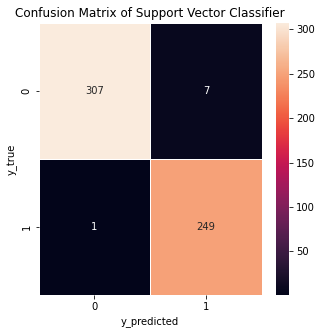




              precision    recall  f1-score   support

           0       1.00      0.98      0.99       314
           1       0.97      1.00      0.98       250

    accuracy                           0.99       564
   macro avg       0.98      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564






In [125]:
print('\n')
cm_lr = confusion_matrix(y_test,clf.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Support Vector Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

### Risultati
Il modello SVM ha ottenuto ottimi risultati, lo score totate di accuratezza pari a circa 99%, inoltre sia per gli utenti reali che per quelli fake precision e recall sono molto alte, entrambe vicine se non pari al 100%

## Nearest Neighbors

Il valore dei k neighbor da considerare per lo svolgimento dell'algoritmo è stato trovato aumentando k gradualmente fino a raggiungere il massimo delle prestazioni possibili.

In [169]:
neigh = KNeighborsClassifier(n_neighbors=210)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_lr = neigh.score(X_test,y_test)

print("Accuracy: {:.3f}%".format(accuracy_lr*100))

Accuracy: 56.028%


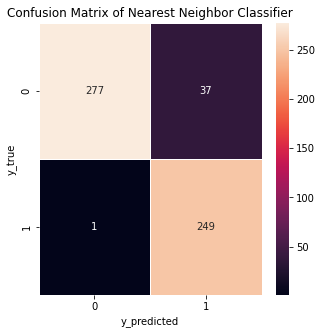




              precision    recall  f1-score   support

           0       1.00      0.88      0.94       314
           1       0.87      1.00      0.93       250

    accuracy                           0.93       564
   macro avg       0.93      0.94      0.93       564
weighted avg       0.94      0.93      0.93       564






In [147]:
print('\n')
cm_lr = confusion_matrix(y_test,neigh.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Nearest Neighbor Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

### Risultati
Anche il modello Nearest Neighbors ha ottenuto degli ottimi risultati, anche se inferiori rispetto a SVM. Lo score totale di accuratezza di assesta infatti intorno al 93%, mentre invece i valori di precision e recall per entrambe le classi sono alti, precision per utenti fake e recall per utenti reali sono pari a circa 88%, buoni ma inferiori rispetto a quelli ottenuti da SVM.

# Training con feature ridotte

Per curiosità sono stati ripetuti i test con solo le feature che, priori ed intuitivamente, erano state ritenute le più adatte da utilizzare, cioè:
- **statuses_count**
- **followers_count**
- **friends_count**
- **favourites_count**

Le ragioni che hanno spinto verso queste ipotesi sono: tipicamente i profili fake (bot) tendono ad aggiungere moltissimi profili agli amici e seguono moltissime pagine, il loro scopo è quello di diffondersi maggiormente oppure far ottenere dei grandi numeri ai clienti del servizio di "boosting", quindi sicuramente il valore di queste feature sarà senz'altro **molto** più alto in un profilo fake che in un profilo reale.

Non è necessario effettuare alcun encoding dato che tutte le feature proposte presentano lo stesso tipo di valore numerico.

In [149]:
real_users = pd.read_csv("data/users.csv")
fake_users = pd.read_csv("data/fake_users.csv")

real_users['isFake'] = 0
fake_users['isFake'] = 1

dataset = pd.concat([real_users,fake_users])

train_data, test_data = train_test_split(dataset, test_size = 0.20, random_state = 100)

In [150]:
train_data.drop(train_data.columns.difference(['statuses_count','followers_count', 'friends_count',
                                               'favourites_count', 'isFake']),1, inplace=True)
test_data.drop(test_data.columns.difference(['statuses_count','followers_count', 'friends_count',
                                               'favourites_count', 'isFake']),1, inplace=True)

/tmp/ipykernel_10038/808171969.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_data.drop(train_data.columns.difference(['statuses_count','followers_count', 'friends_count',
/tmp/ipykernel_10038/808171969.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data.drop(test_data.columns.difference(['statuses_count','followers_count', 'friends_count',


In [151]:
y_train = train_data.isFake          
X_train = train_data.drop(['isFake'], axis=1)  

y_test = test_data.isFake         
X_test = test_data.drop(['isFake'], axis=1)

## Support Vector Machine

In [109]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_lr = clf.score(X_test,y_test)

print("Accuracy: {:.3f}%".format(accuracy_lr*100))

Accuracy: 83.865%


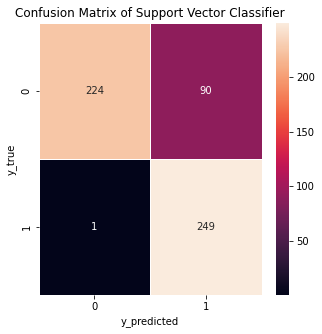




              precision    recall  f1-score   support

           0       1.00      0.71      0.83       314
           1       0.73      1.00      0.85       250

    accuracy                           0.84       564
   macro avg       0.87      0.85      0.84       564
weighted avg       0.88      0.84      0.84       564






In [110]:
print('\n')
cm_lr = confusion_matrix(y_test,clf.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Support Vector Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

### Risultati
Effettivamente le prestazioni raggiunte in questo caso sono inferiori rispetto a quello ottenuto utilizzando tutte le feature trovate eseguendo una feature analysis, tuttavia si può dire che possono essere considerati risultati tutto sommato soddisfacenti.

## Nearest Neighbors

In questo caso il miglior valore di k è 1, si utilizza quindi il caso particolare della 1-nn che considera solo il singolo data point più vicino a quello preso in esame.

In [163]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_lr = neigh.score(X_test,y_test)

print("Accuracy: {:.3f}%".format(accuracy_lr*100))

Accuracy: 98.582%


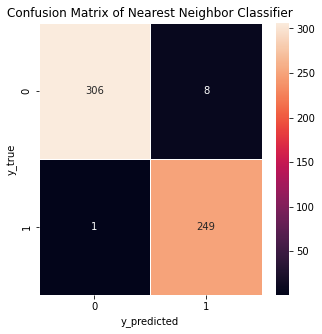




              precision    recall  f1-score   support

           0       1.00      0.97      0.99       314
           1       0.97      1.00      0.98       250

    accuracy                           0.98       564
   macro avg       0.98      0.99      0.98       564
weighted avg       0.98      0.98      0.98       564






In [155]:
print('\n')
cm_lr = confusion_matrix(y_test,neigh.predict(X_test))
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Nearest Neighbor Classifier")
plt.show()
print('\n\n')
print(classification_report(y_test,y_pred))
print('\n\n')

### Risultati
L'output ottenuto dal modello Nearest Neighbor prendendo in considerazione solo le feature descritte precedentemente è inaspettatamente più alto rispetto a quello ottenuto dal training precedente, scoredi accuratezza, valori di precision e recall per entrambe le classi sono vicine se non pari al 100%.